In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
# Define the model
model = Sequential([
  Dense(16,activation='relu',input_shape=(1,)),
  Dense(32,activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='linear')
])



In [7]:
# generate test and training data

def f(x):
    return 5 * x**2 + 10 * x - 2

x = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = f(x) + np.random.randn(*x.shape) * 5 

# Shuffle the data
indices=np.random.permutation(len(x))
x=x[indices]
y=y[indices]

x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

In [17]:
# Train the model
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.01,verbose=1)


Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 39.3935 - mae: 4.9405 - val_loss: 25.5953 - val_mae: 4.3268
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.2502 - mae: 4.1272 - val_loss: 24.7122 - val_mae: 4.3970
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.9829 - mae: 4.1903 - val_loss: 26.9907 - val_mae: 4.1977
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.2968 - mae: 4.3871 - val_loss: 25.7048 - val_mae: 4.1589
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.9588 - mae: 4.5921 - val_loss: 23.8820 - val_mae: 4.3951
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.4885 - mae: 4.4241 - val_loss: 25.7301 - val_mae: 4.4922
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.8690 - mae: 4.4424 - val_loss: 26.7401 - val_mae: 4.3751
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.9791 - mae: 4.3487 - val_loss: 33.0141 - val_mae: 4.3289
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━

In [22]:
# evaluate model
loss, mae = model.evaluate(x_test, y_test, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.6499 - mae: 4.3333 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


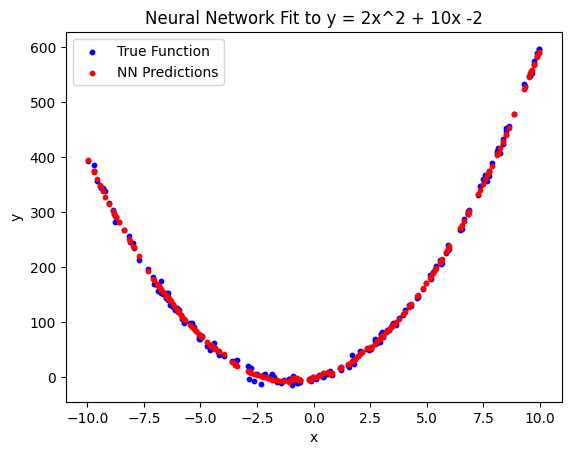

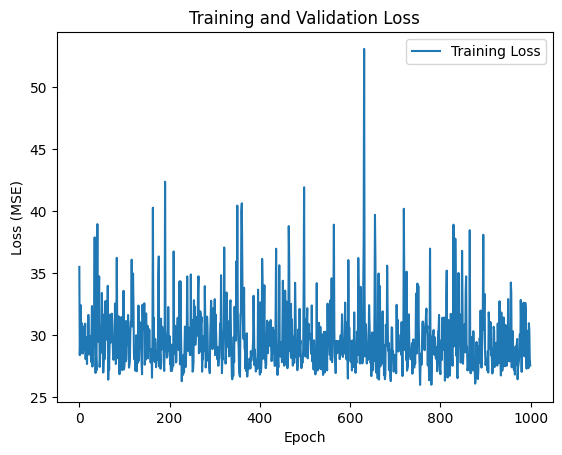

In [23]:

# 6. Make Predictions
y_pred = model.predict(x_test)

# 7. Visualize Results
plt.scatter(x_test, y_test, label='True Function', color='blue', s=10)
plt.scatter(x_test, y_pred, label='NN Predictions', color='red', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Fit to y = 2x^2 + 10x -2')
plt.legend()
plt.show()

# 8. Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()